In [3]:
using Plots
using Distributions
using Printf

include("../scripts/robot.jl")
import .RealRobotWorld: RealRobot, RealCamera
import .RealRobotWorld: Agent, Landmark, Map, Camera, Robot, World
import .RealRobotWorld: data, decision, state_transition, circle_shape, draw, append

mutable struct EstimationAgent <: Agent
    nu::Float64
    omega::Float64

    function EstimationAgent(
        nu,
        omega)

        new(
            nu, 
            omega
        )
    end
end

function draw(self::EstimationAgent, plt)
    plot!(plt, annotation = (0, 0, "t = "*@sprintf("hoge"), :black))   
end

draw (generic function with 6 methods)

┌ Info: Saved animation to 
│   fn = /home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_mcl/tmp.gif
└ @ Plots /home/szmlb/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/szmlb/workspace/github/code-practice/julia/detailed_probo/src/section_mcl/tmp.gif")
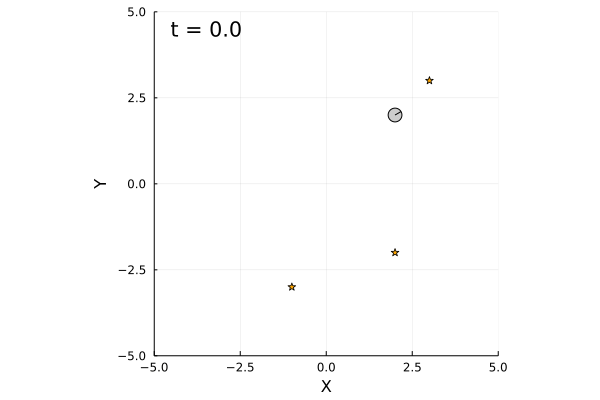

In [4]:
world = World(10, 1)

### 地図を生成して３つランドマークを追加 ###
m = Map()
append(m, Landmark([2, -2]))
append(m, Landmark([-1, -3]))
append(m, Landmark([3, 3]))
append(world, m)

initial_pose = [2, 2, pi/6]
circling = EstimationAgent(0.2, 10.0/180.0*pi)
r = RealRobot(initial_pose, :black, 0.2, circling)
append(world, r)

### アニメーション実行 ###
draw(world)